In [1]:
from dimelo.parse_bam import *
import sys
import os
import matplotlib.pyplot as plt
import pysam
from dimelo.plot_enrichment_profile import *

Default Linux configuration: ../dependencies/linux for executables.


In [2]:
# utils.generate_centered_windows_bed(
#     '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
#     '/clusterfs/nilah/oberon/datasets/ctcf_peaks/',
#     1000
# )
    

In [3]:
# with open ('/clusterfs/nilah/oberon/datasets/ctcf_peaks/1000bp windows ENCFF797SDL.chm13v1.1.bed') as f:
#     for line in f:
#         print(line)
#         break

In [ ]:
num_cores = 32
two_color_2023_chip = parse_bam_pileup(
    input_file='/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.retagged.ma.sorted.bam',
    output_name='mod_mappings.01.ENCFF797SDL',
    ref_genome='/clusterfs/nilah/oberon/genomes/chm13.draft_v1.1.fasta',
    bed_file='/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
    thresh=0.9,
    window_size=500,
    cores=num_cores
)

No output directory provided, using input directory /clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context
Processing from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed500-for-pileup.bed
Allocating requested 32 cores.
Modification threshold of 0.9 will be treated as coming from range 0-1.


> parsed user-input threshold 0.9 for mod-code m
> parsed user-input threshold 0.9 for mod-code a
> parsing BED at /clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.ENCFF797SDL/ENCFF797SDL.chm13v1.1.windowed500-for-pileup.bed
> processed 41861 BED lines
> calculated chunk size: 48, interval size 100000, processing 4800000 positions concurrently
> Using filter threshold 0.9 for mod code m.
> Using filter threshold 0.9 for mod code a.


In [4]:
num_cores = 32
fifth_floor_ctcf = parse_bam_pileup(
    input_file='/clusterfs/nilah/oberon/datasets/dimelo_5th-floor/mod_mappings.retagged.sorted.bam',
    output_name='mod_mappings.ENCFF797SDL',
    ref_genome='/clusterfs/nilah/oberon/genomes/chm13.draft_v1.1.fasta',
    bed_file='/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
    thresh=0.9,
    window_size=500,
    cores=num_cores
)

Processing from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed
Allocating requested 32 cores.
Modification threshold of 0.9 will be treated as coming from range 0-1.


> parsed user-input threshold 0.9 for mod-code m
> parsed user-input threshold 0.9 for mod-code a
> parsing BED at /clusterfs/nilah/oberon/datasets/dimelo_5th-floor/mod_mappings.ENCFF797SDL/ENCFF797SDL.chm13v1.1.windowed.bed
> processed 41861 BED lines
> calculated chunk size: 48, interval size 100000, processing 4800000 positions concurrently
> Using filter threshold 0.9 for mod code m.
> Using filter threshold 0.9 for mod code a.
> Done, processed 21602446 rows. Processed ~122044 reads and skipped zero reads.


In [ ]:
!../dependencies/modkit/modkit update-tags \
/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.sorted.bam \
/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.sorted.bam \
--threads 32 --mode ambiguous \
--log-filepath /clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/update_tags.log

> 8046 Updating ModBAM                                                          

In [ ]:
!../dependencies/modkit/modkit adjust-mods \
/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.sorted.bam \
/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.ma.sorted.bam \
--convert Z m --convert Y a \
--log-filepath /clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/adjust_mods.log

> Converting Z to m
> Converting Y to a
▸▹▹▹▹ [00:01:58] 29839 Adjusting modBAM                                         

In [1]:
!module load samtools && samtools index \
/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.sorted.bam

In [5]:
ctcf_modbam = pysam.AlignmentFile('/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.sorted.bam')

In [1]:
# for read in ctcf_modbam.fetch('chr1',1000000,2000000):
#     print(read.modified_bases)
#     break

In [6]:
num_cores = 32
deep_ctcf_chip = parse_bam_pileup(
    input_file='/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.sorted.bam',
    output_name='deep_ctcf_mod_mappings_merge.retagged.sorted.ENCFF797SDL',
    ref_genome='/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/genomes/chm13.draft_v1.0.fasta',
    bed_file='/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.0.bed',
    thresh=0.9,
    window_size=500,
    cores=num_cores
)

Processing from ENCFF797SDL.chm13v1.0.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.0.windowed.bed
Allocating requested 32 cores.
Modification threshold of 0.9 will be treated as coming from range 0-1.


> parsed user-input threshold 0.9 for mod-code a
> parsed user-input threshold 0.9 for mod-code m
> parsing BED at /clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.sorted.ENCFF797SDL/ENCFF797SDL.chm13v1.0.windowed.bed
> processed 41861 BED lines
> calculated chunk size: 48, interval size 100000, processing 4800000 positions concurrently
> Using filter threshold 0.9 for mod code a.
> Using filter threshold 0.9 for mod code m.
> Done, processed 27282191 rows. Processed ~869470 reads and skipped zero reads.


Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed500-for-readout.bed
Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed500-for-readout.bed
Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed500-for-readout.bed


<Axes: xlabel='pos', ylabel='fraction modified bases'>

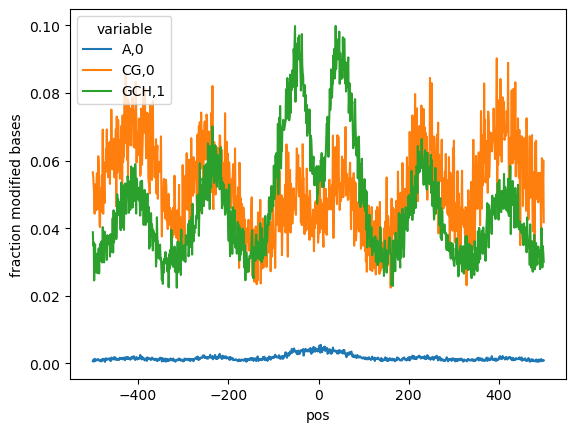

In [3]:
plot_enrichment_profile_vary_mod(
    two_color_2023_chip,
    bed_file_name= '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
    window_size=500,
    mod_names=['A,0','CG,0','GCH,1'],
)

Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed
Loading regions from ENCFF797SDL-first-1000.chm13v1.0.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL-first-1000.chm13v1.0.windowed.bed


<Axes: xlabel='pos', ylabel='fraction modified bases'>

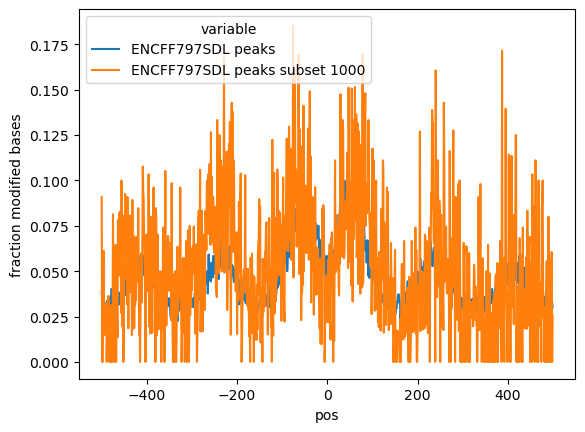

In [8]:
plot_enrichment_profile_vary_regions(
    two_color_2023_chip,
    bed_file_names= ['/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
                     '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL-first-1000.chm13v1.0.bed'],
    window_size=500,
    mod_name='GCH,1',
    sample_names=['ENCFF797SDL peaks','ENCFF797SDL peaks subset 1000']
)

Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed
Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed
Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed


<Axes: xlabel='pos', ylabel='fraction modified bases'>

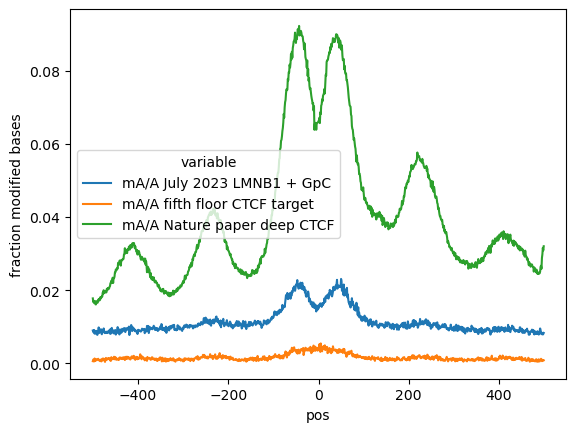

In [9]:
plot_enrichment_profile_vary_experiments(
    mod_file_names=[fifth_floor_ctcf,
                   two_color_2023_chip,
                   deep_ctcf_chip],
    bed_file_name= '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
    window_size=500,
    mod_name='A,0',
    sample_names=['mA/A July 2023 LMNB1 + GpC','mA/A fifth floor CTCF target','mA/A Nature paper deep CTCF']
)

Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed500-for-readout.bed
Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed500-for-readout.bed
Loading regions from ENCFF797SDL.chm13v1.0.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.0.windowed500-for-readout.bed
Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed500-for-readout.bed
Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed500-for-readout.bed
Loading regions from ENCFF797SDL.chm13v1.0.bed using even 50

Text(0.5, 1.0, 'ENCFF797SDL ChIP-seq peaks')

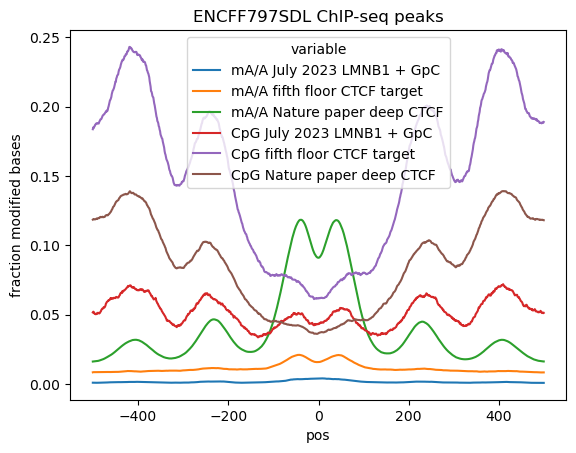

In [3]:
plot_enrichment_profile_base(
    mod_file_names = ['/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.ENCFF797SDL.sorted.bed.gz',
                     '/clusterfs/nilah/oberon/datasets/dimelo_5th-floor/mod_mappings.ENCFF797SDL.sorted.bed.gz',
                     '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.sorted.ENCFF797SDL.sorted.bed.gz',
                     '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.ENCFF797SDL.sorted.bed.gz',
                     '/clusterfs/nilah/oberon/datasets/dimelo_5th-floor/mod_mappings.ENCFF797SDL.sorted.bed.gz',
                     '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.sorted.ENCFF797SDL.sorted.bed.gz'],
    bed_file_names = ['/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
                    '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
                    '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.0.bed',
                     '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
                    '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
                    '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.0.bed'],
    mod_names = ['A,0','A,0','A,0','CG,0','CG,0','CG,0'],
    sample_names = ['mA/A July 2023 LMNB1 + GpC','mA/A fifth floor CTCF target','mA/A Nature paper deep CTCF',
                   'CpG July 2023 LMNB1 + GpC','CpG fifth floor CTCF target','CpG Nature paper deep CTCF'],
    window_size = 500,
    smooth_window = 25,
)
plt.title('ENCFF797SDL ChIP-seq peaks')